In [15]:
os.getcwd()

'c:\\Users\\akaju\\Documents\\GitHub\\xfc-btms-saev-controller\\examples'

import simulation broker and vehicle generator

In [18]:
import sys
sys.path.append('../')
import components
import matplotlib.pyplot as plt

# simulation broker
path_Sim = "../test_data/beam1/beam1-0.csv"
dtype_Sim = {
       'time': 'int64', 'type': 'category', 'vehicle': 'int64', 'parkingTaz': 'category','chargingPointType': 'category', 
       'primaryFuelLevel': 'float64', 'mode': 'category', 'currentTourMode': 'category', 'vehicleType': 'category', 
       'arrivalTime': 'float64', 'departureTime': 'float64', 'linkTravelTime': 'string', 'primaryFuelType': 'category', 
       'parkingZoneId': 'category','duration': 'float64' 
        }
SimBroker = components.SimBroker(path_Sim, dtype_Sim)

# vehicle generator
path_DataBase = "../test_data/vehicleFiles/vehicletypes-Base_2035_20210204_updated.csv"
VehicleGenerator = components.VehicleGenerator(path_Sim, dtype_Sim, path_DataBase)

set up simulation

In [65]:
timestep = 5* 60
N = 10
SimBroker.reset()
i = 0

press this to load new timestep

actual time:  21163
Vehicle with the following properties: 
VehicleId: 6380476 VehicleType: phev-L1-0-to-50000-LowTech-2035-Car-PHEV_25 Arrival: 20935 Desired End Time: 21051 Vehicle Energy: 0.7796114333229484 Desired Energy: 5.612944766656281 SOC: 0.11143421363900904 Maximal Energy: 6.996158611111111 Max Charging Power: 150.0


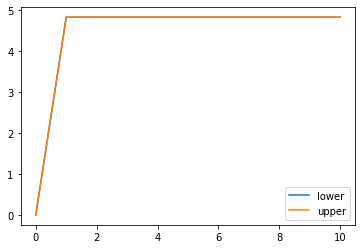

In [142]:
again = True
while again and i< len(slice):
    if slice.iloc[i]["type"] == "ChargingPlugInEvent":
        print('actual time: ', SimBroker.t_act)
        vehicle = VehicleGenerator.generateVehicleSO(slice.iloc[i])
        print(vehicle)
        again = False

        traj_lower, traj_upper = vehicle.getChargingTrajectoryLower(SimBroker.t_act, timestep, N=N)
        plt.plot(traj_lower, label = "lower")
        plt.plot(traj_upper, label = "upper")
        plt.legend()
    i+=1
if i >= len(slice):
    slice = SimBroker.step(timestep)
    i = 0
    print("loaded new slice")
    print('actual time: ', SimBroker.t_act)
# calculate trajectory